Notebook for analyzing the stability of steady states to invasion.
Includes code for generating Figures 2 (b) in the main text and 1 (b) in the SI.


In [1]:
import numpy as np
import scipy.sparse as sparse
import scipy.io as sio
import pickle


In [2]:
# Load data for model.
directory = '../ModelFiles/FiveSpecies/'

# S contains the stoichiometry matrices R_{k} and R_{k}^{ex} for each species k.
S = sio.loadmat(directory + '/S.mat')['S']
I = sio.loadmat(directory + '/I.mat')['I'][0][0]
J = sio.loadmat(directory + '/J.mat')['J'][0][0]
reaction_lb = sio.loadmat(directory + '/lb.mat')['lb']
reaction_ub = sio.loadmat(directory + '/ub.mat')['ub']

# Indices of reactions and metabolites for each species, needed because 
# cobra groups all metabolites and reactions into a single model.
lumen_reactions_idx = sio.loadmat(directory + '/lumen_reactions_idx.mat')['lumen_reactions_idx'] - 1
lumen_metabolites_idx = sio.loadmat(directory + '/lumen_metabolites_idx.mat')['lumen_metabolites_idx'] - 1
lumen_reaction_names = sio.loadmat(directory + '/lumen_reactions.mat')['lumen_reactions']

Ec1_reactions_idx = sio.loadmat(directory + '/Ec1_reactions_idx.mat')['Ec1_reactions_idx'] - 1
Ec1_reaction_names = sio.loadmat(directory + '/Ec1_reactions.mat')['Ec1_reactions']
Ec1_metabolites_idx = sio.loadmat(directory + '/Ec1_metabolites_idx.mat')['Ec1_metabolites_idx'] - 1
Ec1_biomass_idx = sio.loadmat(directory + '/Ec1_biomass_idx.mat')['Ec1_biomass_idx'][0][0]-1

Ec2_reactions_idx = sio.loadmat(directory + '/Ec2_reactions_idx.mat')['Ec2_reactions_idx'] - 1
Ec2_reaction_names = sio.loadmat(directory + '/Ec2_reactions.mat')['Ec2_reactions']
Ec2_metabolites_idx = sio.loadmat(directory + '/Ec2_metabolites_idx.mat')['Ec2_metabolites_idx'] - 1
Ec2_biomass_idx = sio.loadmat(directory + '/Ec2_biomass_idx.mat')['Ec2_biomass_idx'][0][0]-1

Ec3_reactions_idx = sio.loadmat(directory + '/Ec3_reactions_idx.mat')['Ec3_reactions_idx'] - 1
Ec3_reaction_names = sio.loadmat(directory + '/Ec3_reactions.mat')['Ec3_reactions']
Ec3_metabolites_idx = sio.loadmat(directory + '/Ec3_metabolites_idx.mat')['Ec3_metabolites_idx'] - 1
Ec3_biomass_idx = sio.loadmat(directory + '/Ec3_biomass_idx.mat')['Ec3_biomass_idx'][0][0]-1

Ec4_reactions_idx = sio.loadmat(directory + '/Ec4_reactions_idx.mat')['Ec4_reactions_idx'] - 1
Ec4_reaction_names = sio.loadmat(directory + '/Ec4_reactions.mat')['Ec4_reactions']
Ec4_metabolites_idx = sio.loadmat(directory + '/Ec4_metabolites_idx.mat')['Ec4_metabolites_idx'] - 1
Ec4_biomass_idx = sio.loadmat(directory + '/Ec4_biomass_idx.mat')['Ec4_biomass_idx'][0][0]-1

I1 = len(Ec1_metabolites_idx); I2 = len(Ec2_metabolites_idx); I3 = len(Ec3_metabolites_idx); I4 = len(Ec4_metabolites_idx)
Jl = len(lumen_reactions_idx); J1 = len(Ec1_reactions_idx); J2 = len(Ec2_reactions_idx); J3 = len(Ec3_reactions_idx); J4 = len(Ec4_reactions_idx)

Ec1_reaction_names = np.array([Ec1_reaction_names[i][0] for i in range(len(Ec1_reaction_names))])
Ec2_reaction_names = np.array([Ec2_reaction_names[i][0] for i in range(len(Ec2_reaction_names))])
Ec3_reaction_names = np.array([Ec3_reaction_names[i][0] for i in range(len(Ec3_reaction_names))])
Ec4_reaction_names = np.array([Ec4_reaction_names[i][0] for i in range(len(Ec4_reaction_names))])
lumen_reaction_names = np.array([lumen_reaction_names[i][0] for i in range(len(lumen_reaction_names))])

# Create vectors that can be dotted with vector of reactions for each species 
# and pull out the biomass reaction.
e1 = sparse.identity(J1 + Jl).tocsr()[:, Ec1_biomass_idx]; e2 = sparse.identity(J2 + Jl).tocsr()[:, Ec2_biomass_idx]
e3 = sparse.identity(J3 + Jl).tocsr()[:, Ec3_biomass_idx]; e4 = sparse.identity(J4 + Jl).tocsr()[:, Ec4_biomass_idx]



In [3]:
death_rate = np.array([0.5])
invaded_steady_states = pickle.load(open("invaded_steady_states.p", "rb"))
uninvaded_steady_states = pickle.load(open("uninvaded_steady_states.p", "rb"))


In [4]:
print(len(invaded_steady_states))
print(len(uninvaded_steady_states))
print(len(invaded_steady_states) + len(uninvaded_steady_states))


75
333
408


In [5]:
steady_states_bm = np.zeros((len(invaded_steady_states) + len(uninvaded_steady_states), 4))
for i in range(len(invaded_steady_states)):
    steady_states_bm[i,:] = invaded_steady_states[i][0]
for i in range(len(uninvaded_steady_states)):
    steady_states_bm[i+len(invaded_steady_states),:] = uninvaded_steady_states[i][0]
    

In [6]:
# Find the SteadyCom solution.
np.where(np.sum(steady_states_bm, axis = 1) == np.max(np.sum(steady_states_bm, axis = 1)))[0]


array([407])

In [8]:
bm1, bm2, bm3, bm4 = steady_states_bm[407, :]


In [9]:
bm1 + bm2 + bm3 + bm4

1.5392444744922371

In [10]:
import sklearn.cluster


In [11]:
kmeans = sklearn.cluster.KMeans(n_clusters = 20)
clusters = kmeans.fit_predict(steady_states_bm[len(invaded_steady_states):])
yada = steady_states_bm[len(invaded_steady_states):, :]


In [12]:
means_cluster1 = np.mean(yada[clusters == 0], axis = 0)
means_cluster2 = np.mean(yada[clusters == 1], axis = 0)
means_cluster3 = np.mean(yada[clusters == 2], axis = 0)
means_cluster4 = np.mean(yada[clusters == 3], axis = 0)
means_cluster5 = np.mean(yada[clusters == 4], axis = 0)
means_cluster6 = np.mean(yada[clusters == 5], axis = 0)
means_cluster7 = np.mean(yada[clusters == 6], axis = 0)
means_cluster8 = np.mean(yada[clusters == 7], axis = 0)
means_cluster9 = np.mean(yada[clusters == 8], axis = 0)
means_cluster10 = np.mean(yada[clusters == 9], axis = 0)
means_cluster11 = np.mean(yada[clusters == 10], axis = 0)
means_cluster12 = np.mean(yada[clusters == 11], axis = 0)
means_cluster13 = np.mean(yada[clusters == 12], axis = 0)
means_cluster14 = np.mean(yada[clusters == 13], axis = 0)
means_cluster15 = np.mean(yada[clusters == 14], axis = 0)
means_cluster16 = np.mean(yada[clusters == 15], axis = 0)
means_cluster17 = np.mean(yada[clusters == 16], axis = 0)
means_cluster18 = np.mean(yada[clusters == 17], axis = 0)
means_cluster19 = np.mean(yada[clusters == 18], axis = 0)
means_cluster20 = np.mean(yada[clusters == 19], axis = 0)


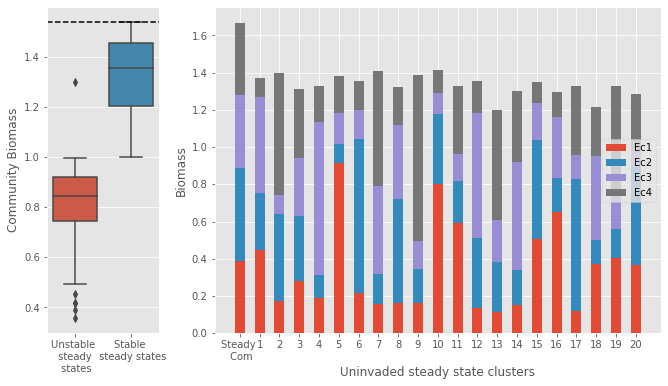

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
labels = ['Steady \n Com', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
bm1_vals = [bm1, means_cluster1[0], means_cluster2[0], means_cluster3[0], means_cluster4[0], means_cluster5[0], means_cluster6[0], means_cluster7[0], means_cluster8[0],
           means_cluster9[0], means_cluster10[0], means_cluster11[0], means_cluster12[0], means_cluster13[0], means_cluster14[0], means_cluster15[0],
           means_cluster16[0], means_cluster17[0], means_cluster18[0], means_cluster19[0], means_cluster20[0]]
bm2_vals = [bm2, means_cluster1[1], means_cluster2[1], means_cluster3[1], means_cluster4[1], means_cluster5[1], means_cluster6[1], means_cluster7[1], means_cluster8[1],
           means_cluster9[1], means_cluster10[1], means_cluster11[1], means_cluster12[1], means_cluster13[1], means_cluster14[1], means_cluster15[1],
           means_cluster16[1], means_cluster17[1], means_cluster18[1], means_cluster19[1], means_cluster20[1]]
bm3_vals = [bm1, means_cluster1[2], means_cluster2[2], means_cluster3[2], means_cluster4[2], means_cluster5[2], means_cluster6[2], means_cluster7[2], means_cluster8[2],
           means_cluster9[2], means_cluster10[2], means_cluster11[2], means_cluster12[2], means_cluster13[2], means_cluster14[2], means_cluster15[2],
           means_cluster16[2], means_cluster17[2], means_cluster18[2], means_cluster19[2], means_cluster20[2]]
bm4_vals = [bm1, means_cluster1[3], means_cluster2[3], means_cluster3[3], means_cluster4[3], means_cluster5[3], means_cluster6[3], means_cluster7[3], means_cluster8[3],
           means_cluster9[3], means_cluster10[3], means_cluster11[3], means_cluster12[3], means_cluster13[3], means_cluster14[3], means_cluster15[3],
           means_cluster16[3], means_cluster17[3], means_cluster18[3], means_cluster19[3], means_cluster20[3]]

width = 0.5

plt.rcParams["figure.figsize"] = (11,6)
fig, ax = plt.subplots(1,2,gridspec_kw={"width_ratios": [1,4]})

graph = sns.boxplot(data = [[np.sum(invaded_steady_states[i][0]) for i in range(len(invaded_steady_states))], [np.sum(uninvaded_steady_states[i][0]) for i in range(len(uninvaded_steady_states))]],
                    orient='v', ax=ax[0])
graph.axhline(bm1+bm2+bm3+bm4, color='black', linestyle = '--')
graph.set(ylabel='Community Biomass')
graph.set_xticklabels(['Unstable \n steady \n states', 'Stable \n steady states'])

ax[1].bar(labels, bm1_vals, width, label='Ec1')
ax[1].bar(labels, bm2_vals, width, label='Ec2', bottom=bm1_vals)
ax[1].bar(labels, bm3_vals, width, label='Ec3', bottom=[bm1_vals[i] + bm2_vals[i] for i in range(len(bm1_vals))])
ax[1].bar(labels, bm4_vals, width, label='Ec4', bottom=[bm1_vals[i] + bm2_vals[i] + bm3_vals[i] for i in range(len(bm1_vals))])
ax[1].set_ylabel('Biomass')
ax[1].set_xlabel('Uninvaded steady state clusters')
ax[1].legend(loc='center right')

plt.style.use('ggplot')
# plt.savefig('invasion_stab_death_rate.png', bbox_inches='tight')
plt.show()




Look more into the underlying chemical reactions for 
a couple of the steady states.

In [14]:
ss2 = uninvaded_steady_states[10]
ss3 = uninvaded_steady_states[20]


In [15]:
biomass_ss2 = ss2[0]
x1_ss2 = ss2[1]
x2_ss2 = ss2[2]
x3_ss2 = ss2[3]
x4_ss2 = ss2[4]


In [16]:
biomass_ss3 = ss3[0]
x1_ss3 = ss3[1]
x2_ss3 = ss3[2]
x3_ss3 = ss3[3]
x4_ss3 = ss3[4]


In [17]:
biomass_steadycom = uninvaded_steady_states[-1][0]
x1_steadycom = uninvaded_steady_states[-1][1]
x2_steadycom = uninvaded_steady_states[-1][2]
x3_steadycom = uninvaded_steady_states[-1][3]
x4_steadycom = uninvaded_steady_states[-1][4]


In [18]:
arg_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_arg__L[u]tr')[0]
lys_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_lys__L[u]tr')[0]
met_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_met__L[u]tr')[0]
phe_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_phe__L[u]tr')[0]


In [19]:
nonzero_rhs_idx = np.where(reaction_lb[lumen_reactions_idx.flatten()] != 0)[0]


In [20]:
print('Number of active right-hand side constraints, steady state 2: ', len(np.where(x1_ss2[J1:][nonzero_rhs_idx] * biomass_ss2[0] + x2_ss2[J2:][nonzero_rhs_idx] * biomass_ss2[1] + x3_ss2[J3:][nonzero_rhs_idx] * biomass_ss2[2] + x4_ss2[J4:][nonzero_rhs_idx] * biomass_ss2[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] == 0)[0]))
print('Number of active right-hand side constraints, steady state 3: ', len(np.where(x1_ss3[J1:][nonzero_rhs_idx] * biomass_ss3[0] + x2_ss3[J2:][nonzero_rhs_idx] * biomass_ss3[1] + x3_ss3[J3:][nonzero_rhs_idx] * biomass_ss3[2] + x4_ss3[J4:][nonzero_rhs_idx] * biomass_ss3[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] == 0)[0]))
print('Number of active right-hand side constraints, SteadyCom steady state: ', len(np.where(x1_steadycom[J1:][nonzero_rhs_idx] * biomass_steadycom[0] + x2_steadycom[J2:][nonzero_rhs_idx] * biomass_steadycom[1] + x3_steadycom[J3:][nonzero_rhs_idx] * biomass_steadycom[2] + x4_steadycom[J4:][nonzero_rhs_idx] * biomass_steadycom[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] == 0)[0]))


Number of active right-hand side constraints, steady state 2:  1
Number of active right-hand side constraints, steady state 3:  2
Number of active right-hand side constraints, SteadyCom steady state:  0


In [21]:
exhausted_aux_mets_invaded = []
exhausted_aux_mets_uninvaded = []
limited_ex_resources_invaded = []
limited_ex_resources_uninvaded = []
active_lb_invaded = []
active_lb_uninvaded = []
active_ub_invaded = []
active_ub_uninvaded = []


In [22]:
arg_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_arg__L[u]tr')[0]
lys_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_lys__L[u]tr')[0]
met_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_met__L[u]tr')[0]
phe_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_phe__L[u]tr')[0]


In [23]:
nonzero_rhs_idx = np.where(reaction_lb[lumen_reactions_idx.flatten()] != 0)[0]


In [24]:
for i in range(len(invaded_steady_states)):
    ss_i = invaded_steady_states[i]
    biomass_ss_i = ss_i[0]
    x1_ss_i = ss_i[1]
    x2_ss_i = ss_i[2]
    x3_ss_i = ss_i[3]
    x4_ss_i = ss_i[4]

    arg_balance = x1_ss_i[arg_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[arg_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[arg_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[arg_ex_idx][0][0] * biomass_ss_i[3]
    arg_balance = int(np.abs(arg_balance) < 1e-6)
    lys_balance = x1_ss_i[lys_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[lys_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[lys_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[lys_ex_idx][0][0] * biomass_ss_i[3]
    lys_balance = int(np.abs(lys_balance) < 1e-6)
    met_balance = x1_ss_i[met_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[met_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[met_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[met_ex_idx][0][0] * biomass_ss_i[3]
    met_balance = int(np.abs(met_balance) < 1e-6)
    phe_balance = x1_ss_i[phe_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[phe_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[phe_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[phe_ex_idx][0][0] * biomass_ss_i[3]
    phe_balance = int(np.abs(phe_balance) < 1e-6)
    exhausted_aux_mets_invaded.append(arg_balance + lys_balance + met_balance + phe_balance)

    nonzero_rhs_idx = np.where(reaction_lb[lumen_reactions_idx.flatten()] != 0)[0]
    active_rhs_idx = np.where(x1_ss_i[J1:][nonzero_rhs_idx] * biomass_ss_i[0] + x2_ss_i[J2:][nonzero_rhs_idx] * biomass_ss_i[1] + x3_ss_i[J3:][nonzero_rhs_idx] * biomass_ss_i[2] + x4_ss_i[J4:][nonzero_rhs_idx] * biomass_ss_i[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]
    limited_ex_resources_invaded.append(len(active_rhs_idx))

    nonzero_reaction_lb_idx = np.where(reaction_lb[Ec1_reactions_idx.flatten()] != 0)[0]
    active_lb = len(np.where(x1_ss_i[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x2_ss_i[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x3_ss_i[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x4_ss_i[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb_invaded.append(active_lb)

    nonzero_reaction_ub_idx = np.where(reaction_ub[Ec1_reactions_idx.flatten()] != 0)[0]
    active_ub = len(np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_ss_i[0:J1][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_ss_i[0:J2][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_ss_i[0:J3][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_ss_i[0:J4][nonzero_reaction_ub_idx] == 0)[0])
    active_ub_invaded.append(active_ub)
    
for i in range(len(uninvaded_steady_states)):
    ss_i = uninvaded_steady_states[i]
    biomass_ss_i = ss_i[0]
    x1_ss_i = ss_i[1]
    x2_ss_i = ss_i[2]
    x3_ss_i = ss_i[3]
    x4_ss_i = ss_i[4]

    arg_balance = x1_ss_i[arg_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[arg_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[arg_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[arg_ex_idx][0][0] * biomass_ss_i[3]
    arg_balance = int(np.abs(arg_balance) < 1e-6)
    lys_balance = x1_ss_i[lys_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[lys_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[lys_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[lys_ex_idx][0][0] * biomass_ss_i[3]
    lys_balance = int(np.abs(lys_balance) < 1e-6)
    met_balance = x1_ss_i[met_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[met_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[met_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[met_ex_idx][0][0] * biomass_ss_i[3]
    met_balance = int(np.abs(met_balance) < 1e-6)
    phe_balance = x1_ss_i[phe_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[phe_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[phe_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[phe_ex_idx][0][0] * biomass_ss_i[3]
    phe_balance = int(np.abs(phe_balance) < 1e-6)
    exhausted_aux_mets_uninvaded.append(arg_balance + lys_balance + met_balance + phe_balance)

    nonzero_rhs_idx = np.where(reaction_lb[lumen_reactions_idx.flatten()] != 0)[0]
    active_rhs_idx = np.where(x1_ss_i[J1:][nonzero_rhs_idx] * biomass_ss_i[0] + x2_ss_i[J2:][nonzero_rhs_idx] * biomass_ss_i[1] + x3_ss_i[J3:][nonzero_rhs_idx] * biomass_ss_i[2] + x4_ss_i[J4:][nonzero_rhs_idx] * biomass_ss_i[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]
    limited_ex_resources_uninvaded.append(len(active_rhs_idx))

    nonzero_reaction_lb_idx = np.where(reaction_lb[Ec1_reactions_idx.flatten()] != 0)[0]
    active_lb = len(np.where(x1_ss_i[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x2_ss_i[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x3_ss_i[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x4_ss_i[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb_uninvaded.append(active_lb)

    nonzero_reaction_ub_idx = np.where(reaction_ub[Ec1_reactions_idx.flatten()] != 0)[0]
    active_ub = len(np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_ss_i[0:J1][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_ss_i[0:J2][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_ss_i[0:J3][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_ss_i[0:J4][nonzero_reaction_ub_idx] == 0)[0])
    active_ub_uninvaded.append(active_ub)
    
    


